<span><h1 style="color: rgb(20, 110, 228);font-weight:bolder;"><center> LAPAGE<center></h1></span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import datetime as dt
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
import math

%matplotlib inline


<span><h2 style="color: rgb(20, 110, 228);font-weight:bolder;"> Partie 1 : Nettoyage</h2></span>


In [2]:
# Read  Excel files
customers = pd.read_csv('Data/customers.csv', sep=',')
products = pd.read_csv('Data/products.csv', sep=',')
transactions = pd.read_csv('Data/transactions.csv', sep=',')


In [3]:
customers.head()


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
products.head()


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
products['categ'].unique()


array([0, 1, 2], dtype=int64)

In [6]:
transactions.head()


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [7]:
transactions.shape


(679532, 4)

In [8]:
products.shape


(3287, 3)

In [9]:
test = pd.merge(products, transactions, left_on="id_prod",
                right_on="id_prod", how="outer", indicator=True)


In [10]:
test[test['_merge'] == "left_only"]


,id_prod,price,categ,date,session_id,client_id,_merge
39705,0_1016,35.06,0.0,NaN,NaN,NaN,left_only
62805,0_1780,1.67,0.0,NaN,NaN,NaN,left_only
162965,0_1062,20.08,0.0,NaN,NaN,NaN,left_only
177722,0_1119,2.99,0.0,NaN,NaN,NaN,left_only
181372,0_1014,1.15,0.0,NaN,NaN,NaN,left_only
188221,1_0,31.82,1.0,NaN,NaN,NaN,left_only
230668,0_1318,20.92,0.0,NaN,NaN,NaN,left_only
253665,0_1800,22.05,0.0,NaN,NaN,NaN,left_only
290609,0_1645,2.99,0.0,NaN,NaN,NaN,left_only
321061,0_322,2.99,0.0,NaN,NaN,NaN,left_only


In [11]:
p_t = pd.merge(products, transactions, left_on="id_prod", right_on="id_prod")


In [12]:
p_t.isna().sum()


id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
dtype: int64

In [13]:
df = pd.merge(p_t, customers, on="client_id", indicator=True)


In [14]:
df.head()


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,both
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,both
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,both
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,both
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,both


In [15]:
df.shape


(679311, 9)

In [16]:
df = df[df['_merge'] == 'both']
df.shape


(679311, 9)

In [17]:
df.isna().sum()


id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
_merge        0
dtype: int64

In [18]:
df.head()


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,both
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,both
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,both
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,both
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,both


In [19]:
df.shape


(679311, 9)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679311 entries, 0 to 679310
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679311 non-null  object  
 1   price       679311 non-null  float64 
 2   categ       679311 non-null  int64   
 3   date        679311 non-null  object  
 4   session_id  679311 non-null  object  
 5   client_id   679311 non-null  object  
 6   sex         679311 non-null  object  
 7   birth       679311 non-null  int64   
 8   _merge      679311 non-null  category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 47.3+ MB


In [21]:
df.describe(include='all')


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
count,679311,679311.000000,679311.000000,679311,679311,679311,679311,679311.000000,679311
unique,3266,NaN,NaN,679150,342276,8602,2,NaN,1
top,1_369,NaN,NaN,test_2021-03-01 02:30:02.237413,s_0,c_1609,m,NaN,both
freq,2252,NaN,NaN,13,200,25488,340920,NaN,679311
mean,NaN,17.449340,0.441823,NaN,NaN,NaN,NaN,1977.817976,NaN
std,NaN,18.329034,0.595002,NaN,NaN,NaN,NaN,13.579191,NaN
min,NaN,-1.000000,0.000000,NaN,NaN,NaN,NaN,1929.000000,NaN
25%,NaN,8.820000,0.000000,NaN,NaN,NaN,NaN,1970.000000,NaN
50%,NaN,13.990000,0.000000,NaN,NaN,NaN,NaN,1980.000000,NaN
75%,NaN,18.990000,1.000000,NaN,NaN,NaN,NaN,1987.000000,NaN


In [126]:
df[df['categ'].isnull()][['id_prod']].value_counts()


Series([], dtype: int64)

<span style="color:#E4C219;font-size: 18px; font-weight: bolder;">Types </span>


In [22]:
df['categ'].nunique()


3

In [23]:
df['sex'].nunique()


2

In [24]:
df['categ'] = df['categ'].astype('category')
df['sex'] = df['sex'].astype('category')


In [25]:
df[df['date'].str.contains("test_")]


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
674494,T_0,-1.0,0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001,both
674495,T_0,-1.0,0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,2001,both
674496,T_0,-1.0,0,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,2001,both
674497,T_0,-1.0,0,test_2021-03-01 02:30:02.237430,s_0,ct_0,f,2001,both
674498,T_0,-1.0,0,test_2021-03-01 02:30:02.237449,s_0,ct_0,f,2001,both
...,...,...,...,...,...,...,...,...,...
674689,T_0,-1.0,0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,both
674690,T_0,-1.0,0,test_2021-03-01 02:30:02.237427,s_0,ct_1,m,2001,both
674691,T_0,-1.0,0,test_2021-03-01 02:30:02.237449,s_0,ct_1,m,2001,both
674692,T_0,-1.0,0,test_2021-03-01 02:30:02.237424,s_0,ct_1,m,2001,both


<span style="color:#19e44c ;font-size: 16px;"> On drop les dates contenant la str "test\_" , elles correpondent à des test effectués</span>


In [117]:
df_without_t_0 = df[df['id_prod'] != 'T_0']


In [118]:
df_without_t_0.shape


(679111, 9)

In [120]:
df_without_t_0


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,both
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,both
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,both
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,both
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,both
...,...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997,both
679307,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,both
679308,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002,both
679309,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,both


In [122]:
df_without_t_0['date'] = pd.to_datetime(df_without_t_0['date'])


C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_6856/2793680876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_t_0['date'] = pd.to_datetime(df_without_t_0['date'])


In [29]:
df_without_t_0.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679310
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  category      
 3   date        679111 non-null  datetime64[ns]
 4   session_id  679111 non-null  object        
 5   client_id   679111 non-null  object        
 6   sex         679111 non-null  category      
 7   birth       679111 non-null  int64         
 8   _merge      679111 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 38.2+ MB


In [30]:
df_without_t_0 = df_without_t_0.drop(columns='_merge')


In [31]:
df_without_t_0.columns


Index(['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id', 'sex',
       'birth'],
      dtype='object')

In [32]:
df_without_t_0.to_csv('Data/Lapage.csv', sep=',', index=False)


<span><h2 style="color: rgb(20, 110, 228) ;font-weight: bolder;"> Partie 2 Exploration</h2></span>


In [3]:
lapage = pd.read_csv('Data/Lapage.csv', sep=',',
                     index_col="date", parse_dates=True)


In [4]:
lapage.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2022-02-20 17:04:37.204937 to 2022-03-21 09:11:12.619736
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  int64  
 3   session_id  679111 non-null  object 
 4   client_id   679111 non-null  object 
 5   sex         679111 non-null  object 
 6   birth       679111 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 41.4+ MB


In [5]:
lapage['categ'] = lapage['categ'].astype('category')
lapage['sex'] = lapage['sex'].astype('category')


In [6]:
lapage.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2022-02-20 17:04:37.204937 to 2022-03-21 09:11:12.619736
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679111 non-null  object  
 1   price       679111 non-null  float64 
 2   categ       679111 non-null  category
 3   session_id  679111 non-null  object  
 4   client_id   679111 non-null  object  
 5   sex         679111 non-null  category
 6   birth       679111 non-null  int64   
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 32.4+ MB


In [7]:
lapage.tail()


,id_prod,price,categ,session_id,client_id,sex,birth
date,,,,,,,
2022-01-28 16:51:07.389515,2_163,68.99,2,s_156517,c_7739,m,1997
2021-07-21 09:11:12.619736,2_101,63.99,2,s_65192,c_7089,m,2002
2022-12-21 09:11:12.619736,2_101,63.99,2,s_315267,c_7089,m,2002
2022-10-21 09:11:12.619736,2_101,63.99,2,s_285788,c_7089,m,2002
2022-03-21 09:11:12.619736,2_101,63.99,2,s_182240,c_7089,m,2002


In [8]:
lapage.shape


(679111, 7)

In [9]:
ca = lapage['price'].sum()
print(f"Le chiffre d'affaire total est de {ca}")


Le chiffre d'affaire total est de 11853728.680000003


In [10]:
lapage.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2022-02-20 17:04:37.204937 to 2022-03-21 09:11:12.619736
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679111 non-null  object  
 1   price       679111 non-null  float64 
 2   categ       679111 non-null  category
 3   session_id  679111 non-null  object  
 4   client_id   679111 non-null  object  
 5   sex         679111 non-null  category
 6   birth       679111 non-null  int64   
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 32.4+ MB


In [11]:
lapage.groupby('date')['price'].sum().sort_values(ascending=False)


date
2022-08-07 06:52:26.810576    300.00
2022-08-12 08:44:00.882917    300.00
2022-11-28 21:24:28.442508    300.00
2022-12-07 06:52:26.810576    300.00
2022-12-06 23:14:33.815188    300.00
                               ...  
2021-05-14 15:26:20.597059      0.62
2021-10-21 01:34:57.453011      0.62
2021-06-20 20:31:40.948364      0.62
2021-04-08 17:47:18.158963      0.62
2021-10-03 06:32:48.512716      0.62
Name: price, Length: 679111, dtype: float64

In [12]:
lapage1 = lapage.copy()


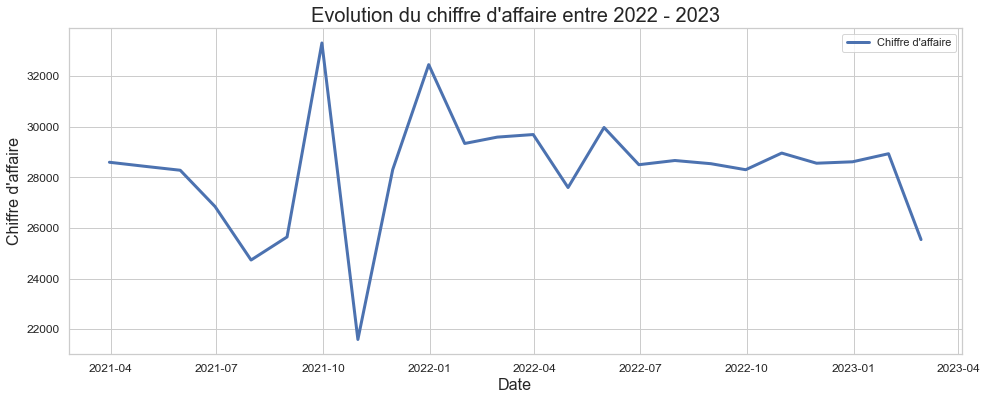

In [13]:
sns.set_theme(style="whitegrid", rc={"lines.linewidth": 3})
plt.figure(figsize=[16, 6])
ax = sns.lineplot(data=lapage1.resample('M').count()['price'])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.set_title("Evolution du chiffre d'affaire entre 2022 - 2023", fontsize=20)
ax.set_ylabel("Chiffre d'affaire", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.legend(labels=["Chiffre d'affaire"])
plt.show()


<span style="color:#19e44c ;font-size: 18px;"> Zoom sur le mois d'octobre pour voir la raison de la chute</span>


In [14]:
lapage['categ'].unique()


[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [15]:
lapage.sort_index(inplace=True)


In [16]:
# lapage.loc['2021-10']['categ'].value_counts().values


In [17]:
# data_oct21=pd.DataFrame(lapage.loc['2021-10']['categ'].value_counts().values,columns=['count'])
# data_oct21['année']=['2021','2021','2021']
# data_oct21['categ']=[0,1,2]


In [18]:
# data_oct22=pd.DataFrame(lapage.loc['2022-10']['categ'].value_counts().values,columns=['count'])
# data_oct22['année']=['2022','2022','2022']
# data_oct22['categ']=[0,1,2]


In [19]:
# pd.concat([data_oct21,data_oct22]).pivot_table(columns='categ',index='année')


In [20]:
test_oc = lapage.reset_index()[['date', 'categ']]


In [21]:
test_oc = test_oc[test_oc['date'].dt.month == 10]


In [22]:
test_oc['annee'] = test_oc['date'].dt.year


In [23]:
categ_count = test_oc.groupby(
    by=['annee', 'categ']).count().rename(columns={'date': 'count'})
categ_count


count
annee categ       
2021  0      18762
      1       1666
      2       1171
2022  0      17664
      1       9726
      2       1574

<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Zoom sur l'année 2021 vente par categorie</span>


<span style="color:#E4C219 ;font-size: 18px;"> Methode 1: Plot</span>


In [24]:
test_month = lapage.reset_index()[['date', 'categ']]


In [25]:
month_oct = test_month.copy()


In [26]:
month_oct = month_oct[month_oct['date'].dt.year == 2021]


In [27]:
month_oct['month'] = month_oct['date'].dt.month


In [28]:
oct_month_categ_2021 = month_oct.groupby(
    by=['month', 'categ']).count().rename(columns={'date': 'count'})


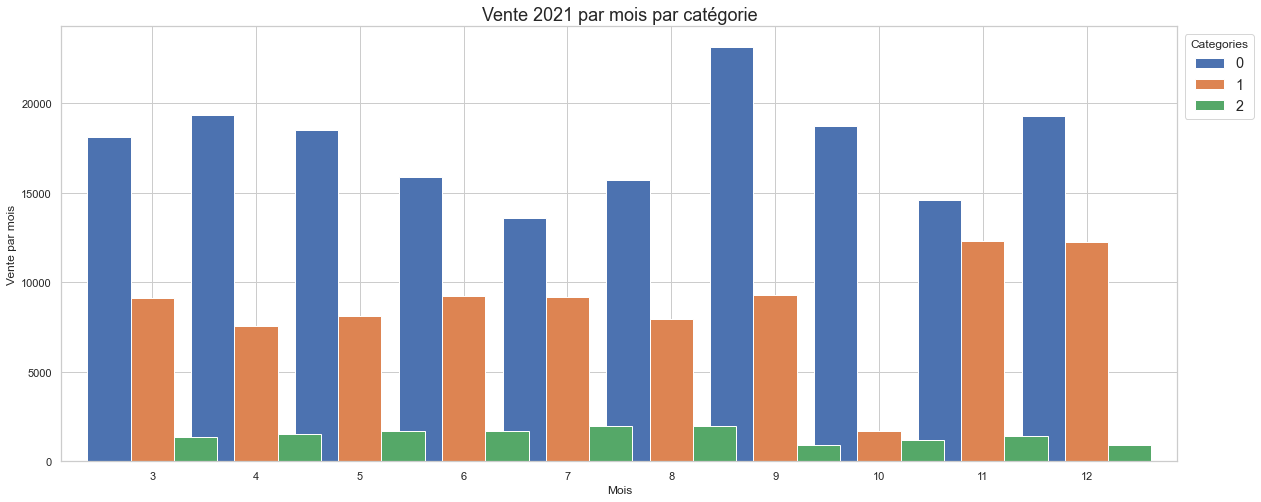

In [29]:
plt.rcParams["figure.figsize"] = (20, 8)
oct_month_categ_2021.unstack().plot(kind='bar', xlabel='Mois',
                                    ylabel='Vente par mois', width=1.25, rot=0)
plt.title("Vente 2021 par mois par catégorie", fontsize=18)
plt.legend(labels=["0", "1", "2"], title="Categories",
           fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show()


<span style="color:#E4C219 ;font-size: 18px;"> Methode 2: Seaborn</span>


In [30]:
by_month = lapage.copy().reset_index()


In [31]:
by_month = by_month[by_month['date'].dt.year == 2021]
by_month


,date,id_prod,price,categ,session_id,client_id,sex,birth
0,2021-03-01 00:01:07.843138,0_1259,11.99,0,s_1,c_329,f,1967
1,2021-03-01 00:02:26.047414,0_1390,19.37,0,s_2,c_664,m,1960
2,2021-03-01 00:02:38.311413,0_1352,4.50,0,s_3,c_580,m,1988
3,2021-03-01 00:04:54.559692,0_1458,6.55,0,s_4,c_7912,f,1989
4,2021-03-01 00:05:18.801198,0_1358,16.49,0,s_5,c_2033,f,1956
...,...,...,...,...,...,...,...,...
278243,2021-12-31 23:44:55.226092,0_1501,11.99,0,s_143108,c_2601,m,1997
278244,2021-12-31 23:45:55.526569,1_451,20.99,1,s_143098,c_5037,f,1974
278245,2021-12-31 23:49:20.478294,0_1378,13.96,0,s_143108,c_2601,m,1997
278246,2021-12-31 23:50:09.039660,0_1054,8.11,0,s_143114,c_6995,f,1960


In [32]:
by_month['month'] = by_month['date'].dt.month


In [33]:
test = by_month.copy()


In [34]:
test = test.set_index('date')


In [35]:
by_month_categ = test.groupby('categ')['price'].resample('D').sum()


In [36]:
by_month_categ = by_month_categ.reset_index()


In [37]:
by_month_categ['month'] = by_month_categ['date'].dt.month


<function matplotlib.pyplot.show(close=None, block=None)>

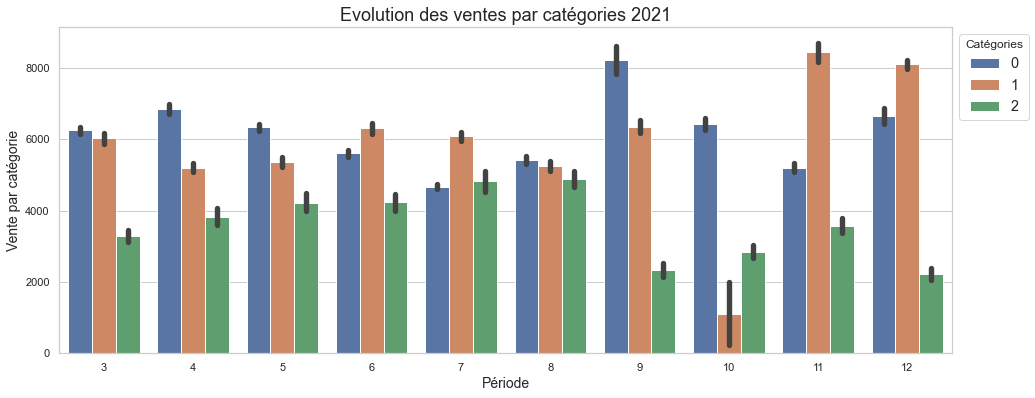

In [38]:
sns.set_theme(style="whitegrid", rc={"lines.linewidth": 3})
plt.figure(figsize=[16, 6])
sns.barplot(data=by_month_categ,
            x=by_month_categ['month'], y=by_month_categ['price'], hue=by_month_categ['categ'])
plt.title("Evolution des ventes par catégories 2021", fontsize=18)
plt.ylabel("Vente par catégorie", fontsize=14)
plt.xlabel("Période", fontsize=14)
plt.legend(title="Catégories", fontsize='large',
           title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Zoom journalier sur octobre 2021 vente par categorie</span>


In [39]:
day_oc_2021 = test_oc.copy()


In [40]:
day_oc_2021 = day_oc_2021[day_oc_2021['annee'] == 2021]


In [41]:
day_oc_2021 = day_oc_2021.drop(columns="annee")


In [42]:
day_oc_2021['day'] = day_oc_2021['date'].dt.day


In [43]:
oct_day_categ_2021 = day_oc_2021.groupby(
    by=['day', 'categ']).count().rename(columns={'date': 'count'})
oct_day_categ_2021


count
day categ       
1   0        663
    1        344
    2         38
2   0        661
    1          0
...          ...
30  1        338
    2         40
31  0        555
    1        342
    2         41

[93 rows x 1 columns]

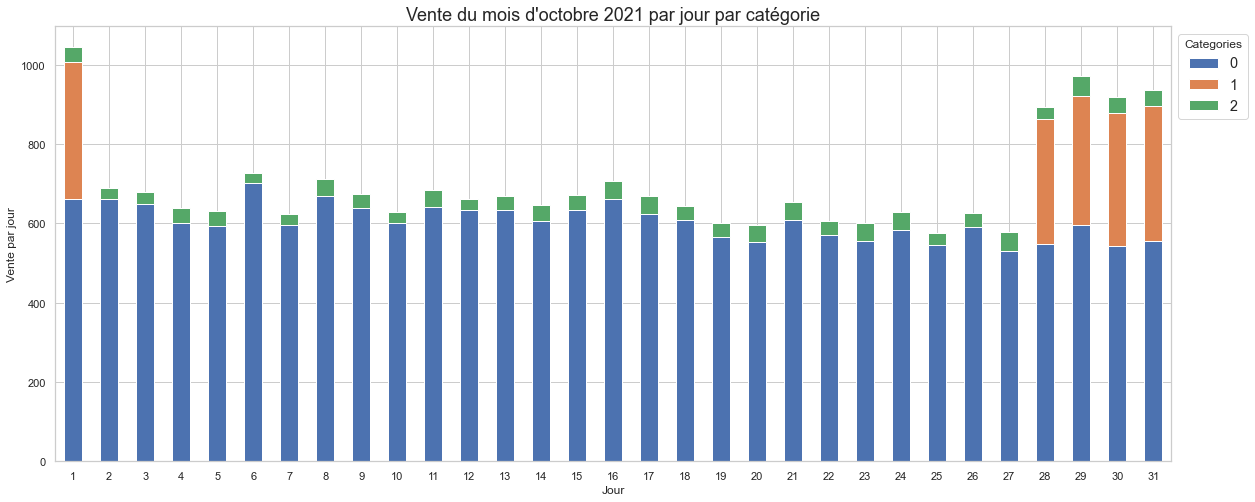

In [44]:
plt.rcParams["figure.figsize"] = (20, 8)
oct_day_categ_2021.unstack().plot(kind='bar', xlabel='Jour',
                                  ylabel='Vente par jour', rot=0, stacked=True)
plt.title("Vente du mois d'octobre 2021 par jour par catégorie", fontsize=18)
plt.legend(labels=["0", "1", "2"], title="Categories",
           fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show()


<span style="color:#19e44c ;font-size: 16px;">Valeurs manquantes : toutes les transactions de produits de catégorie 1 ont été supprimées entre les dates du 2 octobre et du 28 octobre.
On va retirer le mois d'octobre et analyser sur 11 mois</span>


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Tri des index pour le resample et rolling</span>


In [45]:
lapage2 = lapage.copy()


In [46]:
lapage2.sort_index(inplace=True)


<sapn  style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Création de la colonne avec la moyenne mobile de la colonne prix</span>


In [47]:
lapage2['rolling'] = lapage2['price'].rolling('30D').sum()


In [48]:
lapage2['rolling'].sort_values()


date
2021-03-01 00:01:07.843138        11.99
2021-03-01 00:02:26.047414        31.36
2021-03-01 00:02:38.311413        35.86
2021-03-01 00:04:54.559692        42.41
2021-03-01 00:05:18.801198        58.90
                                ...    
2022-03-03 11:35:37.273461    573107.62
2022-03-03 11:31:28.662276    573123.91
2022-03-03 14:08:43.079767    573149.63
2022-03-03 14:07:36.341467    573158.62
2022-03-03 14:07:05.643871    573158.95
Name: rolling, Length: 679111, dtype: float64

In [49]:
lapage2['rolling'].resample('M').mean()


date
2021-03-31    240350.330500
2021-04-30    470494.220035
2021-05-31    477444.521655
2021-06-30    478480.561613
2021-07-31    479195.492368
2021-08-31    463106.045283
2021-09-30    482791.124676
2021-10-31    403724.628883
2021-11-30    417407.629042
2021-12-31    513994.807191
2022-01-31    509557.839244
2022-02-28    539074.910315
2022-03-31    535389.187968
2022-04-30    493028.744367
2022-05-31    499456.803810
2022-06-30    499191.077582
2022-07-31    497592.807788
2022-08-31    488507.086942
2022-09-30    492176.105057
2022-10-31    491581.294787
2022-11-30    495908.623306
2022-12-31    499039.468232
2023-01-31    494376.358327
2023-02-28    492224.009905
Freq: M, Name: rolling, dtype: float64

<span  style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Resample des prix</span>


In [50]:
lapage2['price'].resample('M').count()


date
2021-03-31    28601
2021-04-30    28443
2021-05-31    28285
2021-06-30    26850
2021-07-31    24738
2021-08-31    25650
2021-09-30    33314
2021-10-31    21599
2021-11-30    28311
2021-12-31    32457
2022-01-31    29343
2022-02-28    29594
2022-03-31    29696
2022-04-30    27602
2022-05-31    29975
2022-06-30    28504
2022-07-31    28670
2022-08-31    28544
2022-09-30    28306
2022-10-31    28964
2022-11-30    28563
2022-12-31    28619
2023-01-31    28938
2023-02-28    25545
Freq: M, Name: price, dtype: int64

<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Représentation graphique du chiffre d'affaire</span>


<function matplotlib.pyplot.show(close=None, block=None)>

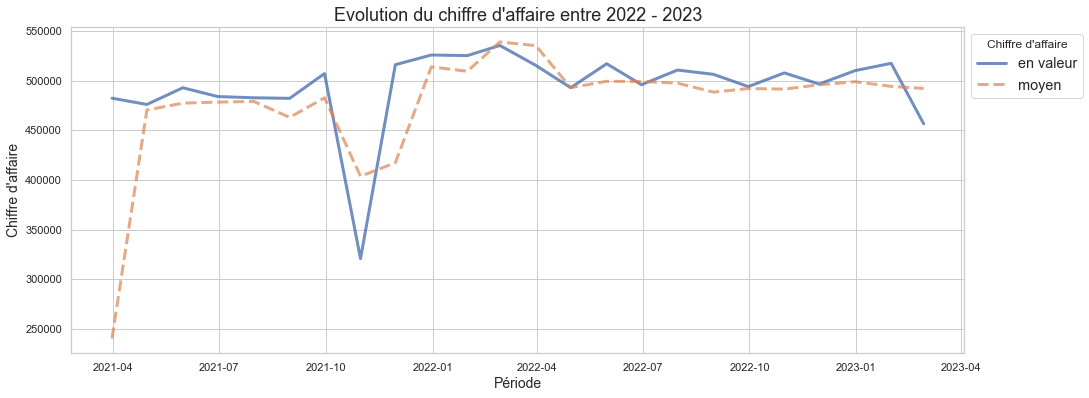

In [51]:
sns.set_theme(style="whitegrid", rc={"lines.linewidth": 3})
plt.figure(figsize=[16, 6])
sns.lineplot(data=lapage2['price'].resample('M').sum(), alpha=0.8)
sns.lineplot(data=lapage2['rolling'].resample(
    'M').mean(), alpha=0.7, linestyle='--')
plt.title("Evolution du chiffre d'affaire entre 2022 - 2023", fontsize=18)
plt.ylabel("Chiffre d'affaire", fontsize=14)
plt.xlabel("Période", fontsize=14)
plt.legend(labels=["en valeur", "moyen"], title="Chiffre d'affaire",
           fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show


<span style="color:#E4C219 ;font-size: 16px;">

Variables supplémentaires
Pour enrichir l'analyse, on crée quelques variables additionnelles, comme :

- Age
- le mois de la transaction
- le nombre de produits achetés par client chaque mois (la fréquence d'achats)
- le nombre de ventes total par client sur l'année entière
- le panier moyen,
- la taille du panier moyen pour chaque client
- le chiffre d'affaires total par client sur l'année

</span>


In [52]:
lp = lapage.copy()


In [53]:
lp = lp.reset_index()


In [54]:
date = dt.datetime.now().year

lp["age"] = date - lp["birth"]
lp


,date,id_prod,price,categ,session_id,client_id,sex,birth,age
0,2021-03-01 00:01:07.843138,0_1259,11.99,0,s_1,c_329,f,1967,54
1,2021-03-01 00:02:26.047414,0_1390,19.37,0,s_2,c_664,m,1960,61
2,2021-03-01 00:02:38.311413,0_1352,4.50,0,s_3,c_580,m,1988,33
3,2021-03-01 00:04:54.559692,0_1458,6.55,0,s_4,c_7912,f,1989,32
4,2021-03-01 00:05:18.801198,0_1358,16.49,0,s_5,c_2033,f,1956,65
...,...,...,...,...,...,...,...,...,...
679106,2023-02-28 23:49:03.148402,1_508,21.92,1,s_348444,c_3573,f,1996,25
679107,2023-02-28 23:51:29.318531,2_37,48.99,2,s_348445,c_50,f,1994,27
679108,2023-02-28 23:53:18.929676,1_695,26.99,1,s_348446,c_488,f,1985,36
679109,2023-02-28 23:58:00.107815,0_1547,8.99,0,s_348447,c_4848,m,1953,68


In [55]:
# Mois de la transaction
lp['mois'] = pd.DatetimeIndex(lp['date']).month  # Mois, de 1 à 12
lp.sample()


,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois
468587,2022-07-17 17:55:17.551275,0_1309,18.99,0,s_239744,c_5540,m,1987,34,7


In [56]:
lp['date_fixe'] = lp['date'].dt.date  # Variable temporaire de date fixe (jour)
lp


,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,date_fixe
0,2021-03-01 00:01:07.843138,0_1259,11.99,0,s_1,c_329,f,1967,54,3,2021-03-01
1,2021-03-01 00:02:26.047414,0_1390,19.37,0,s_2,c_664,m,1960,61,3,2021-03-01
2,2021-03-01 00:02:38.311413,0_1352,4.50,0,s_3,c_580,m,1988,33,3,2021-03-01
3,2021-03-01 00:04:54.559692,0_1458,6.55,0,s_4,c_7912,f,1989,32,3,2021-03-01
4,2021-03-01 00:05:18.801198,0_1358,16.49,0,s_5,c_2033,f,1956,65,3,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...
679106,2023-02-28 23:49:03.148402,1_508,21.92,1,s_348444,c_3573,f,1996,25,2,2023-02-28
679107,2023-02-28 23:51:29.318531,2_37,48.99,2,s_348445,c_50,f,1994,27,2,2023-02-28
679108,2023-02-28 23:53:18.929676,1_695,26.99,1,s_348446,c_488,f,1985,36,2,2023-02-28
679109,2023-02-28 23:58:00.107815,0_1547,8.99,0,s_348447,c_4848,m,1953,68,2,2023-02-28


In [57]:
lp.groupby('client_id').count()['date'].reset_index().rename(
    columns={'date': 'total_ventes'}).sort_values(by="total_ventes", ascending=False)


,client_id,total_ventes
677,c_1609,25488
6337,c_6714,9181
2724,c_3454,6770
4388,c_4958,5195
2513,c_3263,403
...,...,...
3855,c_4478,1
694,c_1624,1
1556,c_240,1
5501,c_5962,1


In [58]:
lp = lp.merge(lp.groupby('client_id').count()['date'].reset_index().rename(
    columns={'date': 'total_ventes'}), how='left', on='client_id', indicator=True)
lp.sample()


,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,date_fixe,total_ventes,_merge
330589,2022-02-22 18:29:35.250227,0_1378,13.96,0,s_169265,c_1609,m,1980,41,2,2022-02-22,25488,both


In [59]:
lp.shape


(679111, 13)

In [60]:
lp[lp['_merge'] == "both"].shape


(679111, 13)

In [61]:
lp = lp.drop(columns='_merge')


vente sur 11 mois on enleve octobre suite a l'analyse sur le CA et les données manquantes pour la categ correspondante


In [62]:
lp['ventes_mensuelles'] = round(lp['total_ventes'] / 11)


In [63]:
lp = lp.merge(
    lp.pivot_table(
        index=['client_id', 'date_fixe'],
        values='price',
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'}),
    on='client_id', how='left')


In [64]:
lp = lp.merge(
    lp.pivot_table(
        index=['client_id', 'date_fixe'],
        values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'panier_moyen'}),
    on='client_id', how='left').drop('date_fixe', axis=1)


In [65]:
lp = lp.merge(
    lp.pivot_table(
        index='client_id', values='price',
        aggfunc='sum').reset_index().rename(
        columns={'price': 'total_achats'}),
    on='client_id', how='left')
lp.sample(3)


,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
293478,2022-01-16 17:18:34.735032,0_2235,13.99,0,s_150744,c_3696,f,1974,47,1,100,9.0,2.50000,12.412663,1198.73
537050,2022-09-29 13:22:00.728780,2_234,81.19,2,s_275239,c_4460,f,2004,17,9,14,1.0,1.00000,54.216429,759.03
677310,2023-02-27 05:59:26.404531,0_1583,15.99,0,s_347562,c_6175,f,1988,33,2,125,11.0,2.55102,16.198092,2016.56


Enieme calcul du chiffre d'affaire ....


In [66]:
ca_annuel = lp.pivot_table(
    index='client_id', values=[
        'total_achats', 'ventes_mensuelles', 'taille_panier_moyen', 'total_ventes', 'panier_moyen']
).sort_values(by='total_achats', ascending=False).reset_index()

ca_annuel.head(10)


,client_id,panier_moyen,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.698451,34.915068,324033.35,25488,2317.0
1,c_4958,56.004691,7.165517,289760.34,5195,472.0
2,c_6714,16.686336,13.022695,153598.92,9181,835.0
3,c_3454,16.494889,9.273973,113637.93,6770,615.0
4,c_3263,13.226564,2.985185,5276.87,403,37.0
5,c_1570,14.795369,2.654676,5271.62,369,34.0
6,c_2899,55.754703,1.640625,5214.05,105,10.0
7,c_2140,12.595187,3.190476,5208.82,402,37.0
8,c_7319,13.434349,2.708029,5155.77,371,34.0
9,c_7959,14.044833,2.713235,5085.45,369,34.0


<span>Les 10 clients aux plus gros chiffres d'affaires annuels</span>


<span style="color:#E4C219 ;font-size: 20px;"> Courbe de Lorenz sur le CA</span>


Incide de Gini : 0.49813749476786895
med 0.8272336922829994


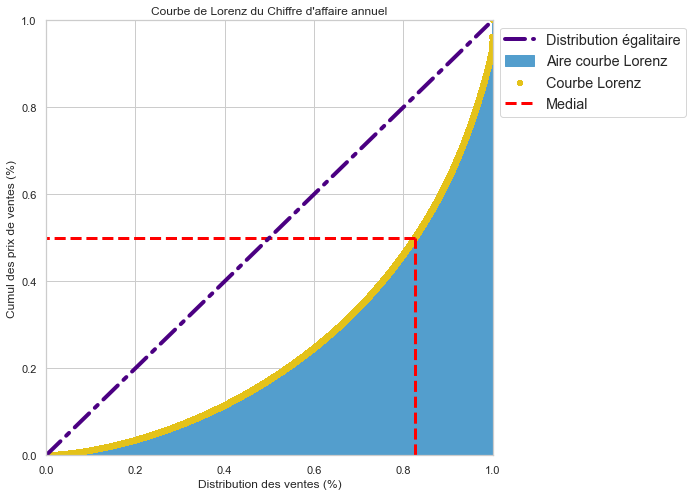

In [67]:
sns.set_theme(style="whitegrid", rc={"lines.linewidth": 3})
plt.figure(figsize=[8, 8])
#  Courbe de Lorenz


def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)

    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    limite_x = (1 - statistics.median(X_lorenz))
    print('med', limite_x)
    X_lorenz = np.insert(X_lorenz, 0, 0)
    plt.fill_between(np.linspace(0, 1, len(X_lorenz)),
                     X_lorenz, color='#539ecd')
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='+',
                    color='#E4C219', linewidth=4)

    # Diagonale
    a = np.arange(0, 1, .01)
    x = a
    y = a

    # Graphique
    sns.lineplot(x=x, y=y, color='#4b0082', linewidth=4,
                 linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.vlines(x=limite_x, ymin=0, ymax=.5, color='red',
               linestyle='--', linewidth=3, label='Medial')
    plt.hlines(xmin=limite_x, xmax=0, y=.5,
               color='red', linestyle='--', linewidth=3)
    plt.xlabel("Distribution des ventes (%)")
    plt.ylabel("Cumul des prix de ventes (%)")
    plt.title(title)
    plt.legend(labels=["Distribution égalitaire", "Aire courbe Lorenz", 'Courbe Lorenz', "Medial"],
               fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
    plt.show()


# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(ca_annuel['total_ventes'],
       "Courbe de Lorenz du Chiffre d'affaire annuel")


<span style="color:#19e44c ;font-size: 16px;">On constate qu'environ 82% des prix représentent 50% du total des prix.
C'est une inégalité , et nous pouvons le confirmer avec l'indice de Gini.</span>


<span style="color:#E4C219 ;font-size: 20px;"> Courbe de Lorenz sur le prix</span>


Incide de Gini : 0.3954702179593257
med 0.7554799988888923


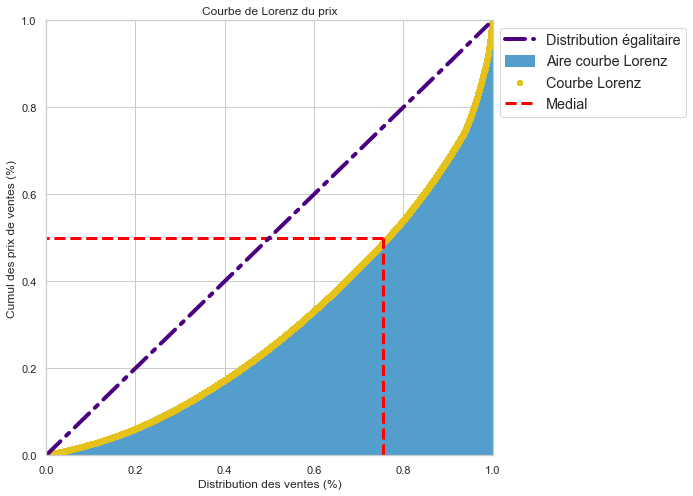

In [68]:
sns.set_theme(style="whitegrid", rc={"lines.linewidth": 3})
plt.figure(figsize=[8, 8])
#  Courbe de Lorenz


def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)

    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    limite_x = (1 - statistics.median(X_lorenz))
    print('med', limite_x)
    X_lorenz = np.insert(X_lorenz, 0, 0)
    plt.fill_between(np.linspace(0, 1, len(X_lorenz)),
                     X_lorenz, color='#539ecd')
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='+',
                    color='#E4C219', linewidth=4)

    # Diagonale
    a = np.arange(0, 1, .01)
    x = a
    y = a

    # Graphique
    sns.lineplot(x=x, y=y, color='#4b0082', linewidth=4,
                 linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.vlines(x=limite_x, ymin=0, ymax=.5, color='red',
               linestyle='--', linewidth=3, label='Medial')
    plt.hlines(xmin=limite_x, xmax=0, y=.5,
               color='red', linestyle='--', linewidth=3)
    plt.xlabel("Distribution des ventes (%)")
    plt.ylabel("Cumul des prix de ventes (%)")
    plt.title(title)
    plt.legend(labels=["Distribution égalitaire", "Aire courbe Lorenz", 'Courbe Lorenz', "Medial"],
               fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
    plt.show()


# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(lp['price'], "Courbe de Lorenz du prix")


<span style="color:#19e44c ;font-size: 16px;">On constate qu'environ 75% des prix représentent 50% du total des prix.
C'est une inégalité , et nous pouvons le confirmer avec l'indice de Gini.</span>


<span style="color:#E4C219 ;font-size: 20px;"> Courbe de Lorenz sur l'age des clients</span>


Incide de Gini : 0.1739286635417434
med 0.619290867269662


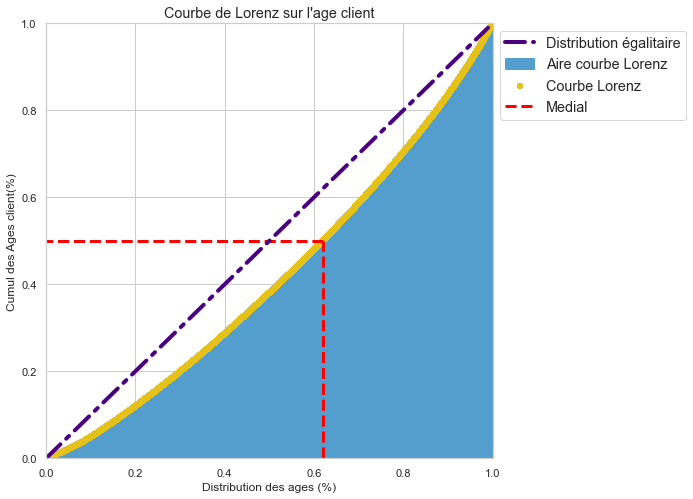

In [69]:
sns.set_theme(style="whitegrid", rc={"lines.linewidth": 3})
plt.figure(figsize=[8, 8])
#  Courbe de Lorenz


def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)

    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    limite_x = (1 - statistics.median(X_lorenz))
    print('med', limite_x)
    X_lorenz = np.insert(X_lorenz, 0, 0)
    plt.fill_between(np.linspace(0, 1, len(X_lorenz)),
                     X_lorenz, color='#539ecd')
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='+',
                    color='#E4C219', linewidth=4)

    # Diagonale
    a = np.arange(0, 1, .01)
    x = a
    y = a

    # Graphique
    sns.lineplot(x=x, y=y, color='#4b0082', linewidth=4,
                 linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.vlines(x=limite_x, ymin=0, ymax=.5, color='red',
               linestyle='--', linewidth=3, label='Medial')
    plt.hlines(xmin=limite_x, xmax=0, y=.5,
               color='red', linestyle='--', linewidth=3)
    plt.title(title, fontsize='large')
    plt.xlabel("Distribution des ages (%)")
    plt.ylabel("Cumul des Ages client(%)")
    plt.legend(labels=["Distribution égalitaire", "Aire courbe Lorenz", 'Courbe Lorenz', "Medial"],
               fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
    plt.show()


# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(lp['age'], "Courbe de Lorenz sur l'age client")


<span style="color:#19e44c ;font-size: 16px;">On constate qu'environ 61% des âges clients représentent 50% du total des âges. C'est une égalité quasi parfaite, et nous pouvons le confirmer avec l'indice de Gini.</span>


<span style="color:#E4C219 ;font-size: 20px;"> Courbe de Lorenz sur l'age des clients - version Marwa</span>


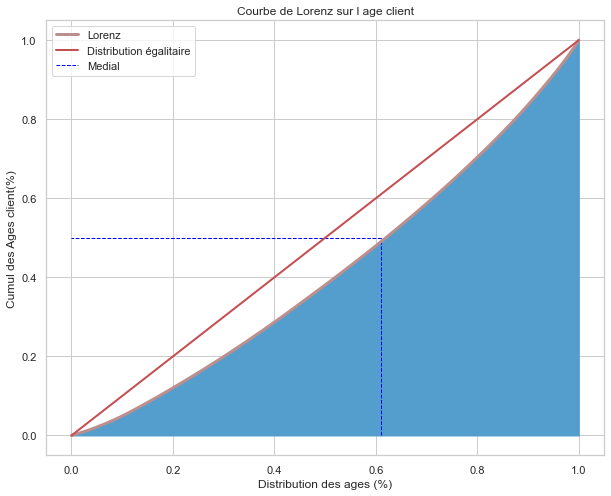

In [70]:
# Courbe de Lorenz sur la variables des prix
# Sélection du sous-échantillon de travail que l'on appelle price
# Tri des individus dans l'ordre croissant des valeurs de la variable,
price = lp['age'].sort_values().values

# On place les observations dans une variable
# Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_price = np.cumsum(price) / price.sum()
plt.figure(figsize=(10, 8))
plt.plot(np.linspace(0, 1, len(lorenz_price)), lorenz_price,
         drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0, 1, len(lorenz_price)),
                 lorenz_price, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue',
           linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz sur l age client')
plt.xlabel("Distribution des ages (%)")
plt.ylabel("Cumul des Ages client(%)")
plt.legend(loc="best")

plt.show()


<span style="color:#E4C219 ;font-size: 16px;">

Questions Marwa :

- Les catégories de livres ont des valeurs moyennes différentes ? Si oui pourquoi?
- Les catégories de livres sont corrélées à l’âge des clients?
- Quelle proportion d'âge est la plus présente et pourquoi à votre avis ?

</span>


In [71]:
ca_annuel.sort_values(by='total_achats', ascending=False).head()


,client_id,panier_moyen,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.698451,34.915068,324033.35,25488,2317.0
1,c_4958,56.004691,7.165517,289760.34,5195,472.0
2,c_6714,16.686336,13.022695,153598.92,9181,835.0
3,c_3454,16.494889,9.273973,113637.93,6770,615.0
4,c_3263,13.226564,2.985185,5276.87,403,37.0


<span style="color:#19e44c ;font-size: 16px;">

        En triant les clients par chiffre d'affaires annuel, 4 clients se détachent. Leur nombre d'achats est
        anormalement plus élevé que celui des autres clients: on a sûrement affaire à des clients professionels.


        Le poids de ces 4 individus risquant d'impacter l'analyse sur des variables comme le sexe ou l'âge, on
        distinguera les clients professionnels des particuliers.

</span>


In [72]:
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
lp['client_type'] = 'particulier'
lp['client_type'].loc[lp[lp['client_id'].isin(
    ca_annuel.head(4)['client_id'])].index] = 'pro'

# Création de 2 datafra
pro = lp[lp['client_type'] == 'pro']
particulier = lp[lp['client_type'] == 'particulier']

lp.sample(3)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type
558306,2022-10-22 03:32:01.421173,0_1580,13.26,0,s_286122,c_5660,f,1977,44,10,133,12.0,2.254237,14.107757,1772.80,particulier
303859,2022-01-27 22:14:01.685026,0_1067,12.99,0,s_156140,c_913,f,1977,44,1,60,5.0,2.857143,11.959921,758.49,particulier
89461,2021-06-05 14:18:51.250234,1_483,15.99,1,s_44446,c_7052,m,1987,34,6,162,15.0,2.025000,13.540862,2222.90,particulier


In [73]:
print('Clients professionnels :', round(pro['price'].sum(
) / lp['price'].sum() * 100, 2), '% du chiffre d\'affaires annuel')


Clients professionnels : 7.43 % du chiffre d'affaires annuel


<span style="color:#19e44c ;font-size: 16px;">Clients professionnels : 7.43 % du chiffre d'affaires annuel . On analysera par la suite les clients de type particuliers</span>


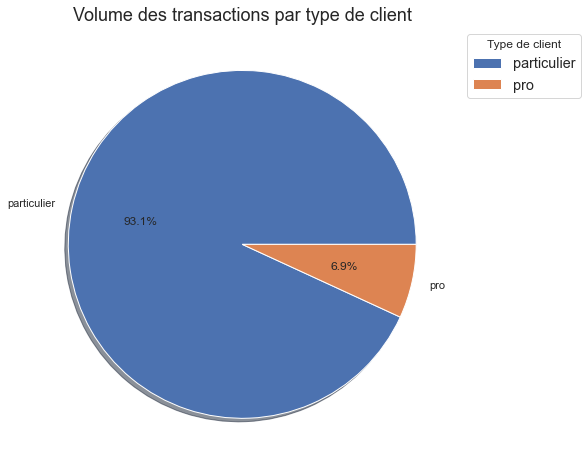

In [74]:
# Proportion des transactions entre professionnels et particuliers
plt.figure(figsize=(12, 8))
lp['client_type'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%',
    shadow=True,
)
plt.title('Volume des transactions par type de client', fontsize=18)
plt.ylabel("")
plt.xlabel("")
plt.legend(title="Type de client",
           fontsize='large', title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show()


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Repartition par Catégorie / Sexe</span>


In [75]:
lp.groupby(by=['sex', 'categ'])['price'].sum()


sex  categ
f    0        2.190013e+06
     1        2.358417e+06
     2        1.311253e+06
m    0        2.229718e+06
     1        2.295306e+06
     2        1.469022e+06
Name: price, dtype: float64

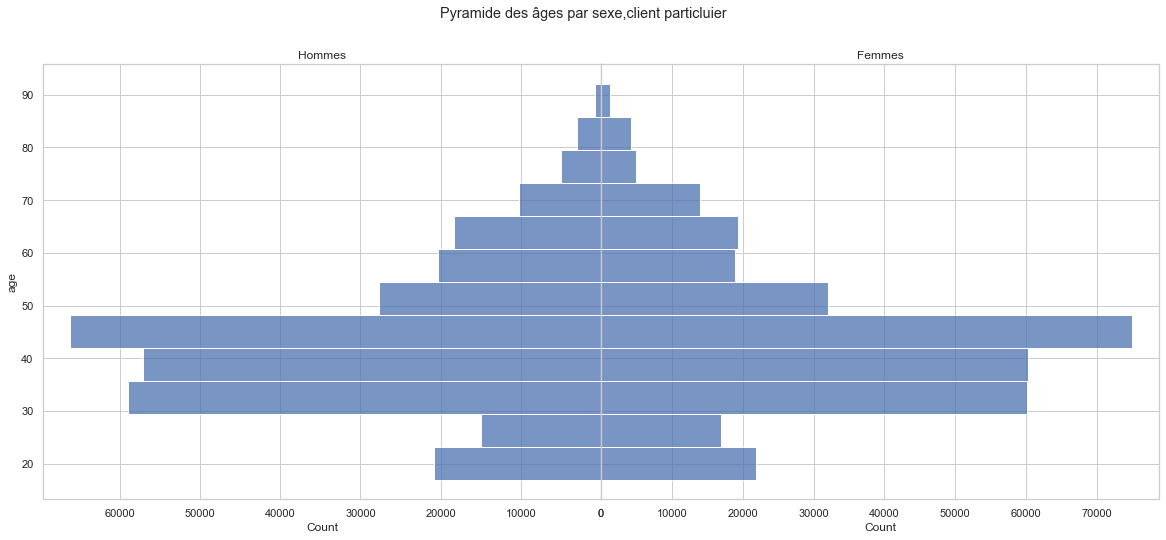

In [76]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe,client particluier')

sns.histplot(
    ax=axes[0], y=particulier[particulier['sex'] == 'm']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(
    ax=axes[1], y=particulier[particulier['sex'] == 'f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

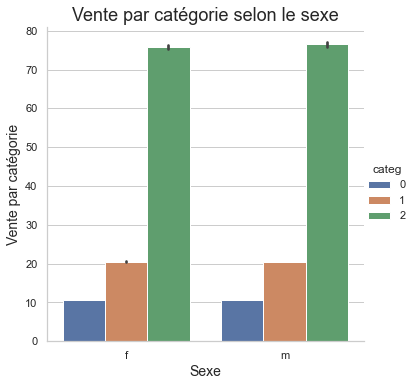

In [77]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (20, 8)
sns.catplot(x="sex", y="price", hue="categ", data=lp, kind="bar")
plt.title("Vente par catégorie selon le sexe", fontsize=18)
plt.ylabel("Vente par catégorie", fontsize=14)
plt.xlabel("Sexe", fontsize=14)
plt.show


<span style="color:#19e44c ;font-size: 16px;">On constate que la vente de certaine catégorie est quasi identique selon le sexe </span>


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Repartition par Catégorie / Age</span>


In [78]:
def category_age(age):
    if age > 15 and age <= 20:
        return '15 - 20 ans'
    elif age > 20 and age <= 30:
        return '20 - 30 ans'
    elif age > 30 and age <= 40:
        return '30 - 40 ans'
    elif age > 50 and age <= 60:
        return '50 - 60 ans'
    else:
        return '+ 60 ans'


In [79]:
lp['classe_age'] = lp['age'].map(category_age).astype('category')
lp


,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type,classe_age
0,2021-03-01 00:01:07.843138,0_1259,11.99,0,s_1,c_329,f,1967,54,3,63,6.0,1.800000,17.707200,1132.94,particulier,50 - 60 ans
1,2021-03-01 00:02:26.047414,0_1390,19.37,0,s_2,c_664,m,1960,61,3,116,11.0,1.115385,19.875000,2290.75,particulier,+ 60 ans
2,2021-03-01 00:02:38.311413,0_1352,4.50,0,s_3,c_580,m,1988,33,3,336,31.0,2.896552,12.801669,4280.71,particulier,30 - 40 ans
3,2021-03-01 00:04:54.559692,0_1458,6.55,0,s_4,c_7912,f,1989,32,3,239,22.0,2.597826,12.722670,3022.26,particulier,30 - 40 ans
4,2021-03-01 00:05:18.801198,0_1358,16.49,0,s_5,c_2033,f,1956,65,3,81,7.0,1.191176,15.253971,1257.07,particulier,+ 60 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,2023-02-28 23:49:03.148402,1_508,21.92,1,s_348444,c_3573,f,1996,25,2,75,7.0,1.785714,34.491032,2461.60,particulier,20 - 30 ans
679107,2023-02-28 23:51:29.318531,2_37,48.99,2,s_348445,c_50,f,1994,27,2,81,7.0,1.327869,48.517732,4265.51,particulier,20 - 30 ans
679108,2023-02-28 23:53:18.929676,1_695,26.99,1,s_348446,c_488,f,1985,36,2,83,8.0,2.075000,13.250188,1054.20,particulier,30 - 40 ans
679109,2023-02-28 23:58:00.107815,0_1547,8.99,0,s_348447,c_4848,m,1953,68,2,157,14.0,1.389381,15.832788,2442.40,particulier,+ 60 ans


In [80]:
lp_age = lp.groupby(by=['categ', 'classe_age'])[
    'price'].sum().sort_values(ascending=True)


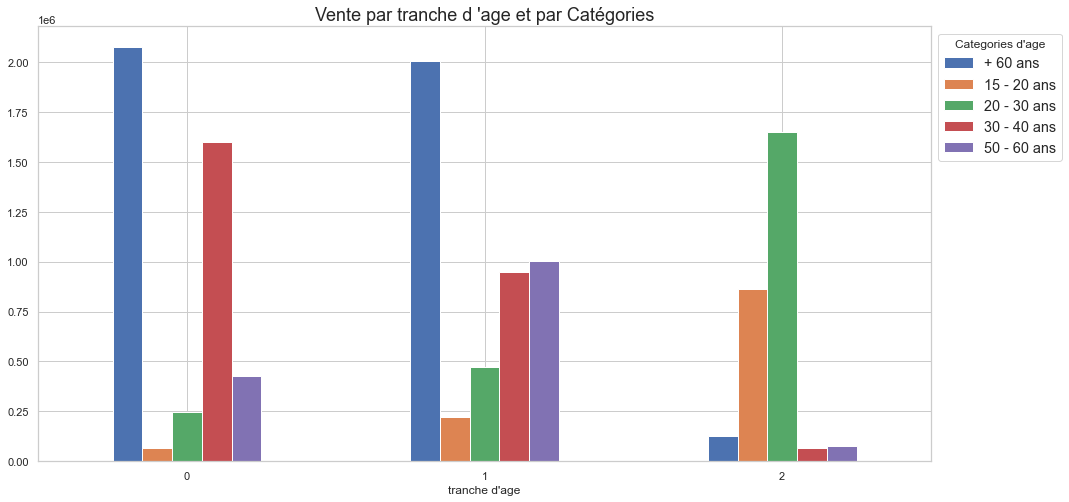

In [81]:
plt.rcParams["figure.figsize"] = (16, 8)
lp_age.unstack().plot(kind='bar', rot=False, xlabel="tranche d'age")
plt.title("Vente par tranche d 'age et par Catégories", fontsize=18)
plt.legend(title="Categories d'age", fontsize='large',
           title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show()


In [82]:
lp_age2 = lp.groupby(by=['categ', 'classe_age'])[
    'price'].count().sort_values(ascending=True)


In [83]:
df_a = pd.DataFrame(lp_age2)
df_a = df_a.reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1152x432 with 0 Axes>

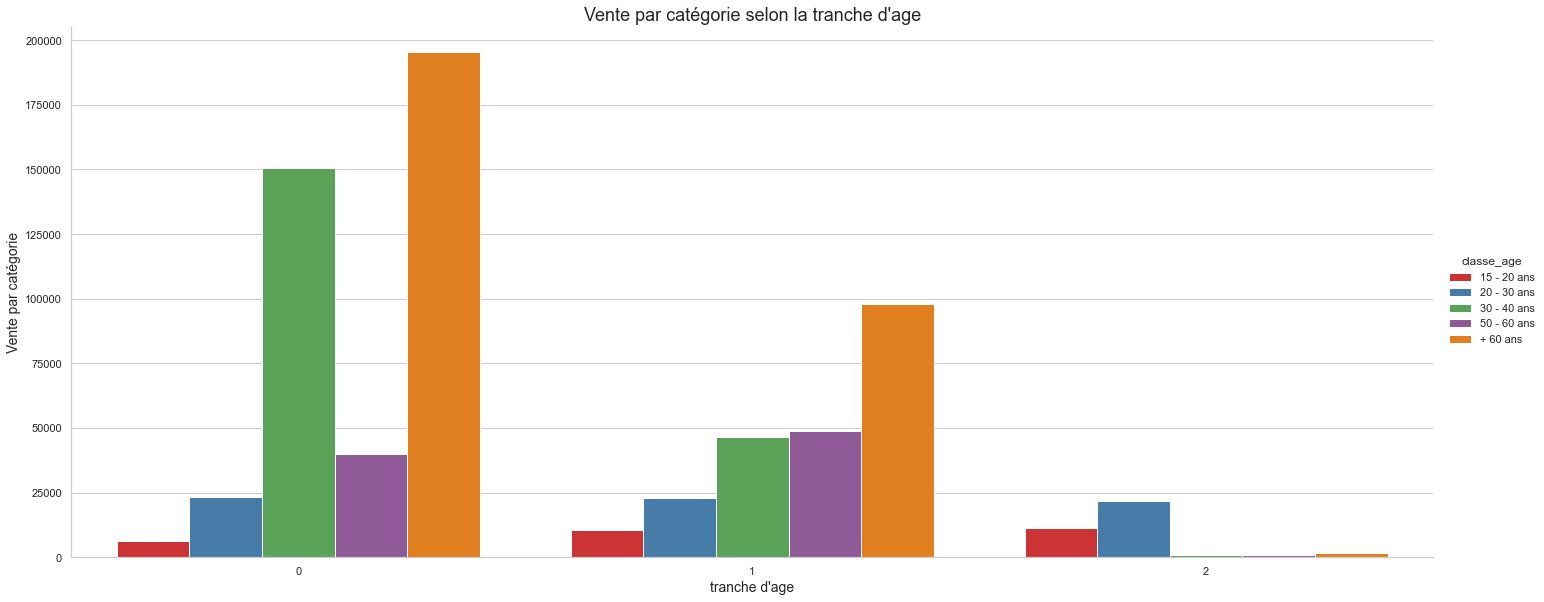

In [84]:
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
plt.figure(figsize=[16, 6])
sns.catplot(x="categ", y="price", hue="classe_age", data=df_a, hue_order=[
            "15 - 20 ans", "20 - 30 ans", "30 - 40 ans", "50 - 60 ans", "+ 60 ans"], kind="bar", height=8, aspect=2.5/1)
plt.title("Vente par catégorie selon la tranche d'age", fontsize=18)
plt.ylabel("Vente par catégorie", fontsize=14)
plt.xlabel("tranche d'age", fontsize=14)
plt.show


<span style="color:#19e44c ;font-size: 16px;">

    On peut voir la categorie 2 intéresse les plus jeune les tranches d'âge comprise entre 15 et 30 ans

    La catégorie 0 est l'achat phare des 60 ans et + et des 30- 40 ans : livre pour enfant peut être ?

    La catégorie 1 reste la plus "équilibré" en terme de catégorie d'âge

</span>


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Distribution des âges clients <span>


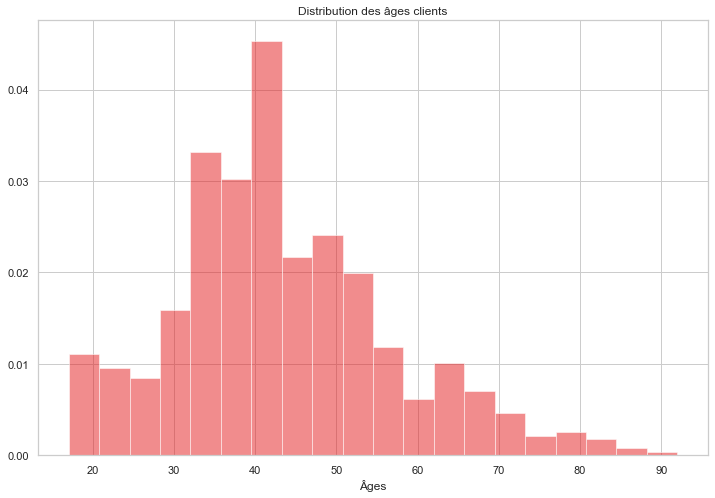

In [85]:
# Visualisation (Histogramme)de la distribution de l'âge clients
plt.figure(figsize=(12, 8))
lp['age'].hist(density=True, alpha=0.5, bins=20)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.show()


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Dispersion des prix produits (histogramme)<span>


<function matplotlib.pyplot.show(close=None, block=None)>

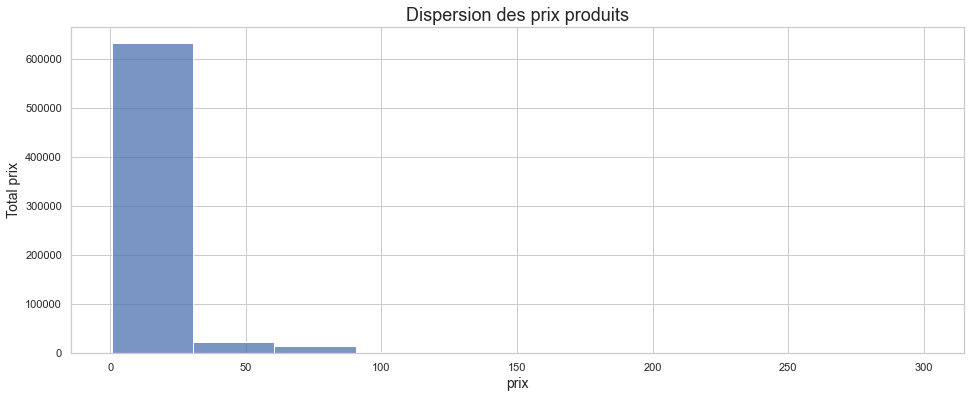

In [86]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[16, 6])
sns.histplot(data=lp, x="price", bins=10)
plt.title("Dispersion des prix produits", fontsize=18)
plt.ylabel("Total prix", fontsize=14)
plt.xlabel("prix", fontsize=14)
plt.show


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Dispersion des prix de vente par catégorie (boxplot) </span>


<function matplotlib.pyplot.show(close=None, block=None)>

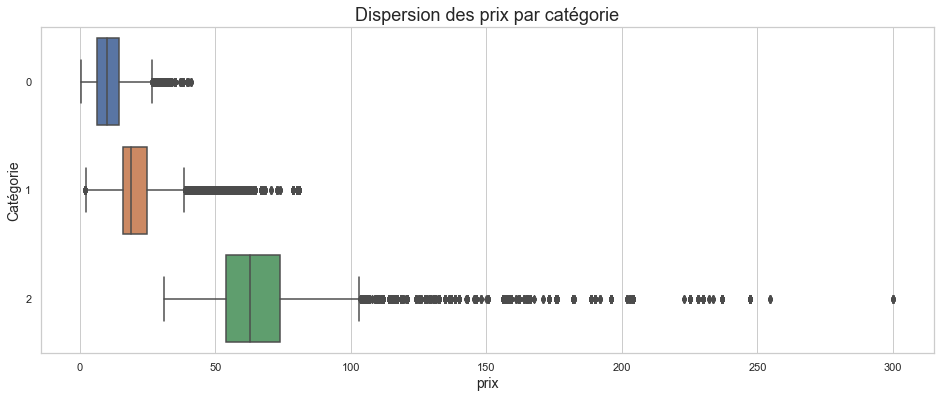

In [87]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[16, 6])
sns.boxplot(data=lp, x="price", y="categ")
plt.title("Dispersion des prix par catégorie", fontsize=18)
plt.ylabel("Catégorie", fontsize=14)
plt.xlabel("prix", fontsize=14)
plt.show


<span style="color:#19e44c ;font-size: 16px;">

</span>


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Analyse des transactions par client (fidélité)</span>


In [88]:
lp_2 = lp.copy().set_index('date')


In [89]:
# Agrégation des modalités de la variable 'client_id' (méthode .groupby())
# L'objectif est de comprendre l'action de ré-achat (ou non)des clients
fid_client = lp_2.groupby('client_id').count().reset_index()
fid_client['nb_transac'] = fid_client.session_id
fid_client = fid_client[['client_id', 'nb_transac']]
fid_client.head()


,client_id,nb_transac
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102


In [90]:
lp_2


,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type,classe_age
date,,,,,,,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,11.99,0,s_1,c_329,f,1967,54,3,63,6.0,1.800000,17.707200,1132.94,particulier,50 - 60 ans
2021-03-01 00:02:26.047414,0_1390,19.37,0,s_2,c_664,m,1960,61,3,116,11.0,1.115385,19.875000,2290.75,particulier,+ 60 ans
2021-03-01 00:02:38.311413,0_1352,4.50,0,s_3,c_580,m,1988,33,3,336,31.0,2.896552,12.801669,4280.71,particulier,30 - 40 ans
2021-03-01 00:04:54.559692,0_1458,6.55,0,s_4,c_7912,f,1989,32,3,239,22.0,2.597826,12.722670,3022.26,particulier,30 - 40 ans
2021-03-01 00:05:18.801198,0_1358,16.49,0,s_5,c_2033,f,1956,65,3,81,7.0,1.191176,15.253971,1257.07,particulier,+ 60 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,21.92,1,s_348444,c_3573,f,1996,25,2,75,7.0,1.785714,34.491032,2461.60,particulier,20 - 30 ans
2023-02-28 23:51:29.318531,2_37,48.99,2,s_348445,c_50,f,1994,27,2,81,7.0,1.327869,48.517732,4265.51,particulier,20 - 30 ans
2023-02-28 23:53:18.929676,1_695,26.99,1,s_348446,c_488,f,1985,36,2,83,8.0,2.075000,13.250188,1054.20,particulier,30 - 40 ans


In [91]:
lp_2[(lp_2['client_id'] == 'c_1001')].loc['2021-12-25', :]


,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type,classe_age
date,,,,,,,,,,,,,,,,
2021-12-25 08:58:01.830845,1_593,20.99,1,s_139712,c_1001,m,1982,39,12,102,9.0,2.318182,15.740398,1812.86,particulier,30 - 40 ans
2021-12-25 09:05:22.002992,0_1380,7.45,0,s_139712,c_1001,m,1982,39,12,102,9.0,2.318182,15.740398,1812.86,particulier,30 - 40 ans
2021-12-25 09:20:47.567882,1_456,28.27,1,s_139712,c_1001,m,1982,39,12,102,9.0,2.318182,15.740398,1812.86,particulier,30 - 40 ans
2021-12-25 09:29:49.319423,1_434,15.87,1,s_139712,c_1001,m,1982,39,12,102,9.0,2.318182,15.740398,1812.86,particulier,30 - 40 ans


In [92]:
fid_client[fid_client['nb_transac'] > 1].shape[0]


8592

In [93]:
fid_client[fid_client['nb_transac'] == 2].shape[0]


42

**Excellente fidélisation des clients qui n'hésitent pas à revenir pour un nouvel achat.**


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Analyse des centres d'intérêt client </span>


In [94]:
# Analyse des quantités de produits vendus selon les catéories
categ_prod = lp_2.groupby('categ').price.count().reset_index()
categ_prod.rename(columns={'price': 'produit_vendus'})


,categ,produit_vendus
0,0,415459
1,1,227169
2,2,36483


In [95]:
# Analyse du chiffre d'affaires selon les catégories
categ_sales = lp_2.groupby('categ').price.sum().reset_index()
categ_sales


,categ,price
0,0,4.419731e+06
1,1,4.653723e+06
2,2,2.780275e+06


**La catégorie 2 ressort moins populaire que les deux autres, moins de quantités vendues, moins de chiffre d'affaires, mais un panier moyen qui reste beaucoup plus élevé.**


**L'analyse va se poursuivre sur l'étude des liens éventuels entre les précédentes variables. L'enjeu est de comprendre les corrélations possibles ou non, de manière à pouvoir tirer des conclusions qui mènera l'entreprise à prendre des décisions stratégiques.**


<span><h2 style="color: rgb(20, 110, 228) ;font-weight: bolder;"> Corrélations</h2></span>


**Les corrélations indiquent si deux variables sont linéairement équivalentes.**

Voici quelques questions supplémentaires pour nous aider à mieux comprendre les ventes enregistrées.

- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
- Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?
- Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) ?
- Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?
- Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?


In [96]:
#Utilisation de la méthode .corr()
lp.corr().head()

,price,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
price,1.000000,0.209465,-0.209465,-0.012306,-0.038457,-0.038463,-0.055880,0.542680,0.019558
birth,0.209465,1.000000,-1.000000,-0.002301,0.018640,0.018628,0.050311,0.420487,0.050031
age,-0.209465,-1.000000,1.000000,0.002301,-0.018640,-0.018628,-0.050311,-0.420487,-0.050031
mois,-0.012306,-0.002301,0.002301,1.000000,0.004839,0.004841,0.005007,-0.009812,0.003600
total_ventes,-0.038457,0.018640,-0.018640,0.004839,1.000000,1.000000,0.995671,-0.073989,0.956544


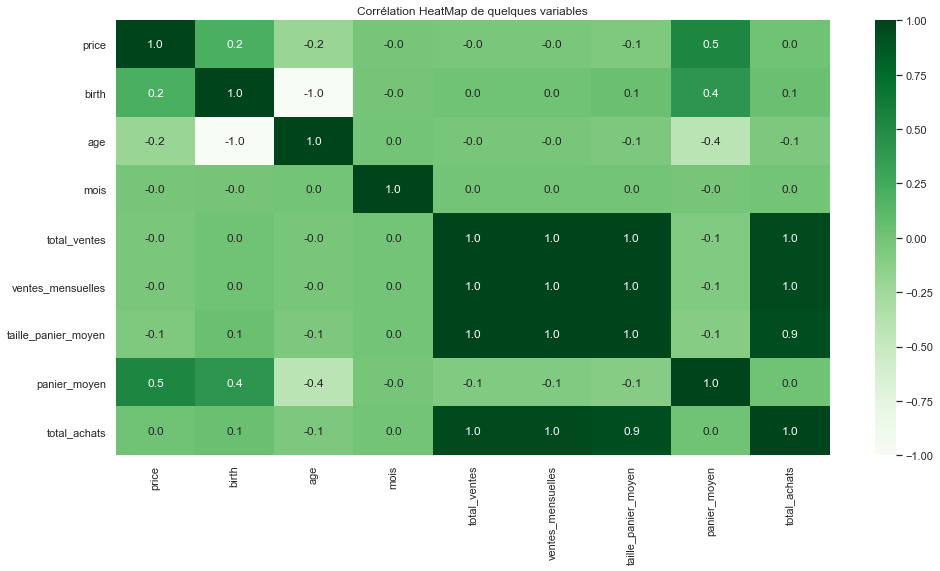

In [97]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
plt.figure(figsize=[16, 8])
sns.heatmap(lp.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap de quelques variables')
plt.show()

<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Catégorie et sexe (Chi 2) </span>


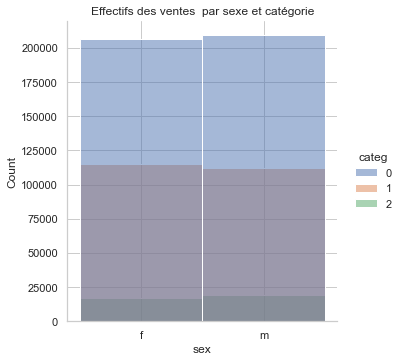

In [98]:
sns.displot(data=lp, x='sex', hue='categ')
plt.title('Effectifs des ventes  par sexe et catégorie')
plt.show()


In [125]:
# Table de contingence
crosstab = pd.crosstab(lp['categ'], lp['sex'], margins=False)
print('Table de contingence :')
print(crosstab)


Table de contingence :
sex         f       m
categ                
0      206103  209356
1      114899  112270
2       17283   19200


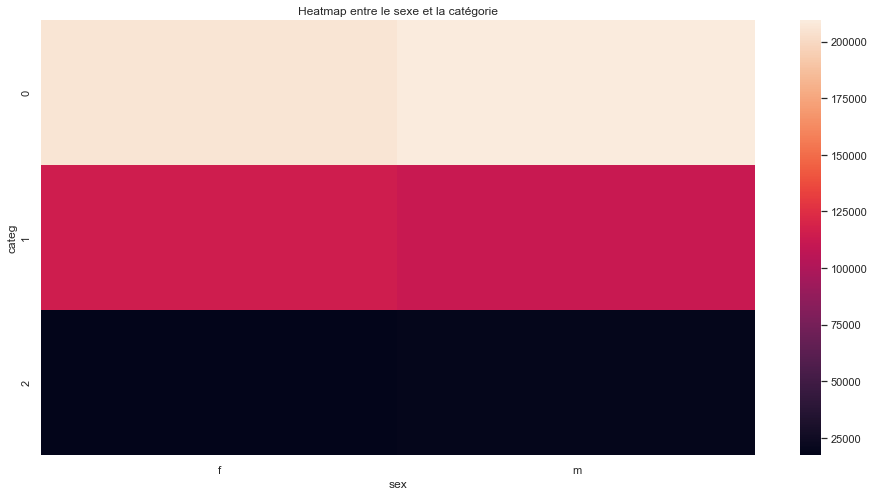

In [100]:
sns.heatmap(crosstab)
plt.title('Heatmap entre le sexe et la catégorie')
plt.show()


In [101]:
# Test de Chi 2
chi2, p, degrees, expected = chi2_contingency(crosstab)
print('Test de Chi 2 (2 catégorielles)')
print('chi2 = %.3f\np-value = %.35f' % (chi2, p))
if p > .05:
    print('H0: les 2 sont indépendants')
else:
    print('H1: il y a une dépendance.')


Test de Chi 2 (2 catégorielles)
chi2 = 147.119
p-value = 0.00000000000000000000000000000001131
H1: il y a une dépendance.


In [102]:
# Version Marwa - Julien
from scipy.stats import chi2_contingency
tab = pd.crosstab(lp["sex"], lp["categ"])
chi2, pvalue, degrees, expected = chi2_contingency(tab)

stat, p, dof, expected = chi2_contingency(tab)
# H0 on va dire que sex et categ sont indépendant
risque = 0.05
print("p value is " + str(p))
if p <= risque:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 1.1310980597090762e-32
Dependent (reject H0)


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Corrélation entre l'âge des clients et le montant total des achats </span>


pour le visual  nuage des points avec plt.scatter ou plt.plot
et avec un test de stat on utilise: Coefficient de corrélation linéaire de Pearson 

In [103]:
age_price = lp.groupby('age').sum().reset_index()
age_price = age_price[['age', 'price']].sort_values(by='age', ascending=False)
age_price['price'] = age_price['price']
age_price.head()


,age,price
75,92,3221.85
74,91,4013.87
73,90,2815.45
72,89,5043.19
71,88,5254.35


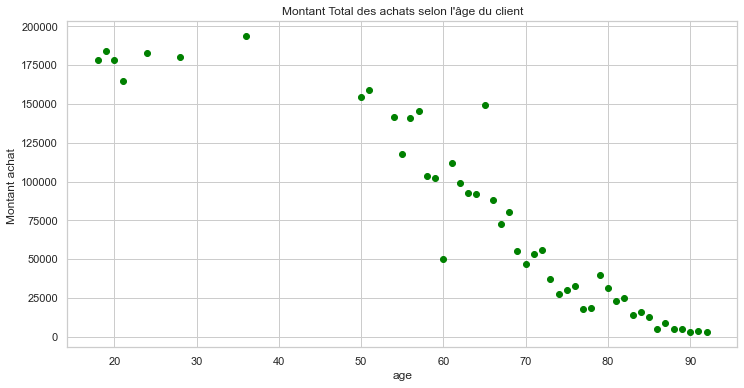

In [104]:
plt.figure(figsize=[12, 6])
plt.plot(age_price[age_price.price < 200000].age,
         age_price[age_price.price < 200000].price, 'o', color='green')
plt.xlabel('age')
plt.ylabel('Montant achat ')
plt.title('Montant Total des achats selon l\'âge du client')
plt.show()


In [105]:
# Coefficient de corrélation linéaire de Pearson
coef_age_price = stats.pearsonr(age_price.age, age_price.price)[0]
coef_age_price


-0.7788810457117024

<span>Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que plus les consommateurs sont agés plus le montant total de leur achat est faible. Or le coefficient est plus proche de -1 que de zéro. Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.(forte correlation)</span>


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) </span>


In [106]:
# Agrégation des données selon l'âge client
# Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
# Hypothèse 1 id_session = 1 transation
customers_freq = lp.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]

# Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)


,age,session_id,f
75,92,201,0.000296
74,91,226,0.000333
73,90,170,0.000250
72,89,311,0.000458
71,88,326,0.000480
70,87,555,0.000817
69,86,271,0.000399
68,85,757,0.001115
67,84,942,0.001387
66,83,834,0.001228


In [133]:
lp

,date,id_prod,price,categ,session_id,client_id,sex,birth,age,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type,classe_age
0,2021-03-01 00:01:07.843138,0_1259,11.99,0,s_1,c_329,f,1967,54,3,63,6.0,1.800000,17.707200,1132.94,particulier,50 - 60 ans
1,2021-03-01 00:02:26.047414,0_1390,19.37,0,s_2,c_664,m,1960,61,3,116,11.0,1.115385,19.875000,2290.75,particulier,+ 60 ans
2,2021-03-01 00:02:38.311413,0_1352,4.50,0,s_3,c_580,m,1988,33,3,336,31.0,2.896552,12.801669,4280.71,particulier,30 - 40 ans
3,2021-03-01 00:04:54.559692,0_1458,6.55,0,s_4,c_7912,f,1989,32,3,239,22.0,2.597826,12.722670,3022.26,particulier,30 - 40 ans
4,2021-03-01 00:05:18.801198,0_1358,16.49,0,s_5,c_2033,f,1956,65,3,81,7.0,1.191176,15.253971,1257.07,particulier,+ 60 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,2023-02-28 23:49:03.148402,1_508,21.92,1,s_348444,c_3573,f,1996,25,2,75,7.0,1.785714,34.491032,2461.60,particulier,20 - 30 ans
679107,2023-02-28 23:51:29.318531,2_37,48.99,2,s_348445,c_50,f,1994,27,2,81,7.0,1.327869,48.517732,4265.51,particulier,20 - 30 ans
679108,2023-02-28 23:53:18.929676,1_695,26.99,1,s_348446,c_488,f,1985,36,2,83,8.0,2.075000,13.250188,1054.20,particulier,30 - 40 ans
679109,2023-02-28 23:58:00.107815,0_1547,8.99,0,s_348447,c_4848,m,1953,68,2,157,14.0,1.389381,15.832788,2442.40,particulier,+ 60 ans


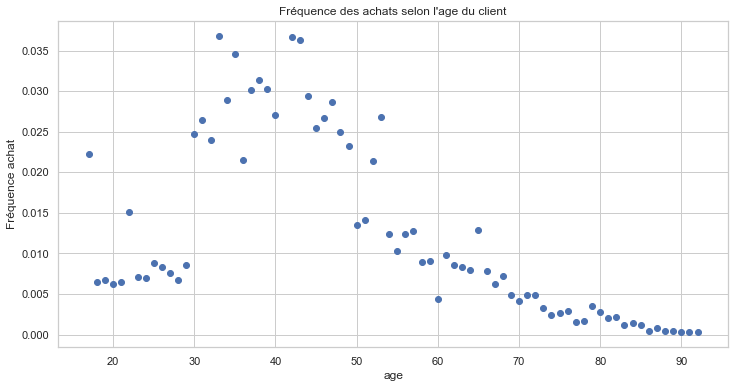

In [107]:
plt.figure(figsize=[12, 6])
plt.plot(customers_freq[customers_freq.f < .05].age,
         customers_freq[customers_freq.f < .05].f, 'o')
plt.xlabel('age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')
plt.show()


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) </span>


 pour le visual  nuage des points avec plt.scatter ou plt.plot
et avec un test de stat on utilise: Coefficient de corrélation linéaire de Pearson 

In [129]:
customers_shop = lp.groupby(['age', 'session_id']).count().reset_index()
customers_shop = customers_shop.groupby('age').mean().reset_index()
customers_shop = customers_shop[['age', 'id_prod']]
customers_shop.tail()


,age,id_prod
71,88,1.399142
72,89,1.509709
73,90,1.770833
74,91,1.547945
75,92,1.500000


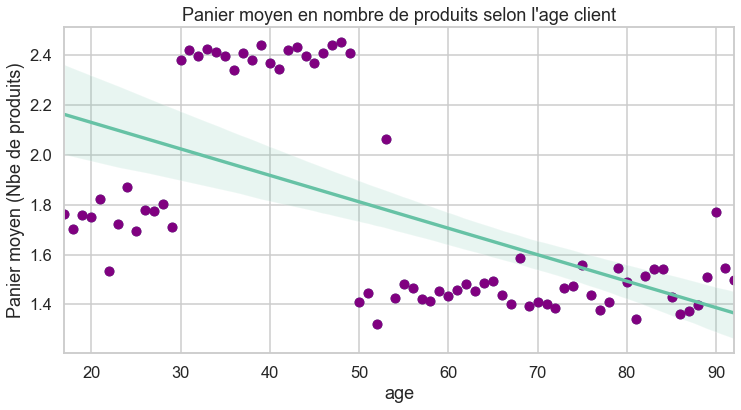

In [130]:
plt.figure(figsize=[12, 6])
plt.plot(customers_shop.age, customers_shop.id_prod, 'o', color='purple')
ax = sns.regplot(x=customers_shop.age, y=customers_shop.id_prod, data=customers_shop)
plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')
plt.show()


In [136]:
# Subsets pour identifier les clusters clients
customers_shop30 = customers_shop[customers_shop.age < 30]
customers_shop3050 = customers_shop[(
    customers_shop.age >= 30) & (customers_shop.age < 50)]
customers_shop50 = customers_shop[customers_shop.age > 51]


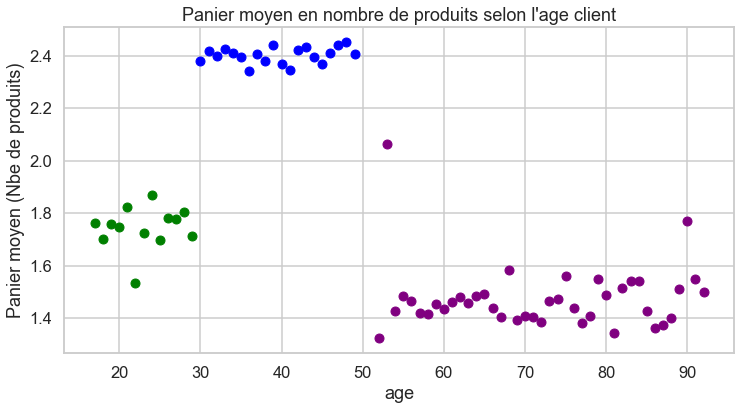

In [137]:
# Visualisation avec scatterplot selon les groupes d'individus identifiés
plt.figure(figsize=[12, 6])

plt.plot(customers_shop30.age, customers_shop30.id_prod, 'o', color='green')
plt.plot(customers_shop3050.age, customers_shop3050.id_prod, 'o', color='blue')
plt.plot(customers_shop50.age, customers_shop50.id_prod, 'o', color='purple')


plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.show()


In [112]:
# Coefficient de corrélation linéaire de Pearson
coef_customers_shop = stats.pearsonr(
    customers_shop.age, customers_shop.id_prod)
coef_customers_shop


(-0.5739035320699193, 5.970918838126314e-08)

Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. Par exemple, sur les individus de plus de 50 ans, le panier moyen reste faible. Il existe également un lien sur les individus de 18 à 30 ans et de 30 à 50 ans. La linéarité de la corrélation existe mais selon des corpus de clients visiblement distincts, par tranches d'âges.


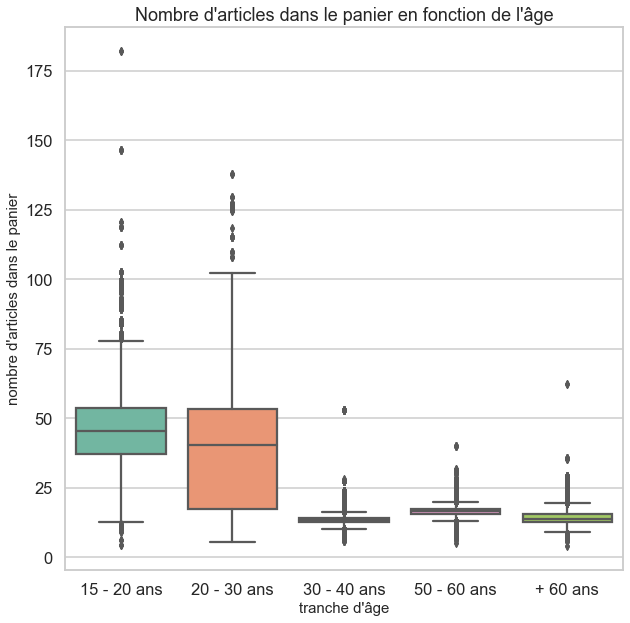

In [113]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10, 10])

sns.boxplot(x='classe_age', y='panier_moyen',
            data=lp,
            order=["15 - 20 ans", "20 - 30 ans",
                   "30 - 40 ans", "50 - 60 ans", "+ 60 ans"]
            )

plt.ylabel('nombre d\'articles dans le panier', size=15)
plt.xlabel("tranche d'âge", size=15)
plt.title('Nombre d\'articles dans le panier en fonction de l\'âge')


plt.show()


In [114]:
# Calcul Eta ²
Xa = "classe_age"
Ya = "panier_moyen"


def eta_squared(x, y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT


print(f'Eta carré: {eta_squared(lp[Xa],lp[Ya]):.2f}')  # donc corrélation


Eta carré: 0.65


<span style="color:#E4C219 ;font-size: 18px; font-weight: bolder;"> Corrélation entre la catégorie et âge eta² / Anova </span>


**Pour simplifier l'analyse, il est nécessaire de procéder par un découpage en catégorie (classe) (discrétisation) . Donc très clairement le but est de pouvoir réduire nos individus "âges" par classes, de manière à pouvoir interpréter plus facilement les résultats.**

**Comment choisir le nombre de classes ou des catégories ? (on peut utiliser la fonction qcut )**
Ou bient l'un de deux formules : 

- Sturges-Huntsberger : $k = 1 + 3.33\times\log(N,base=10)$

- Brooks-Carruthers : $k = 5\times\log(N,base=10)$

Celle orienté par Marwa 2h plus tard ...

In [115]:
#N est le nombre d'observations
N = len(lp.groupby(['age', 'categ']).count().reset_index())

In [116]:
#Formule de Huntsberger : 
1 + ((10/3) * math.log10(N))

8.859782823334847

In [117]:
#Formule de Brooks-Carruthers : 
5 * math.log10(N)

11.78967423500227

Dans notre contexte, nous pouvons retenir un nombre de classes de 9.

In [155]:
#Méthode .groupby() pour agréger les données selon l'âge et la catégorie
classe_age = lp.groupby(['age', 'categ']).count().reset_index()
classe_age = classe_age[['age', 'categ', 'session_id']]
classe_age.sample(5)

,age,categ,session_id
9,20,0,974
213,88,0,142
57,36,0,10970
157,69,1,1949
36,29,0,1245


In [156]:
#Méthode .cut() pour créer les 9 groupes d'âges, une segmentation des individus 'age'
classe_age['age']= pd.cut(classe_age['age'], 9)
classe_age = classe_age.groupby(['age','categ']).sum().reset_index()
classe_age.head(10)

,age,categ,session_id
0,"(16.925, 25.333]",0,12036
1,"(16.925, 25.333]",1,21906
2,"(16.925, 25.333]",2,24694
3,"(25.333, 33.667]",0,62881
4,"(25.333, 33.667]",1,25576
5,"(25.333, 33.667]",2,8810
6,"(33.667, 42.0]",0,160729
7,"(33.667, 42.0]",1,49330
8,"(33.667, 42.0]",2,714
9,"(42.0, 50.333]",0,104416


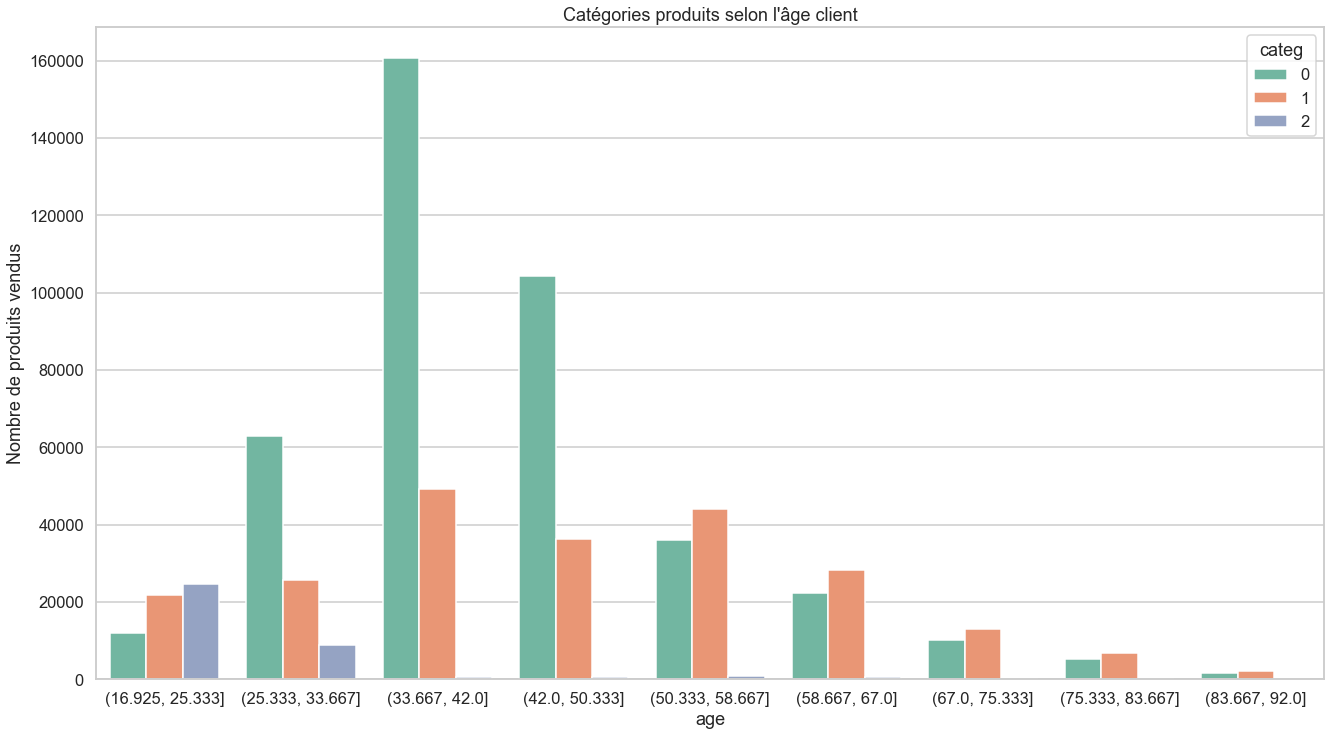

In [157]:
#Visualisation rapide avec une BarPlot Seaborn
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=classe_age)

ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits selon l\'âge client')

plt.show()

Ma version 

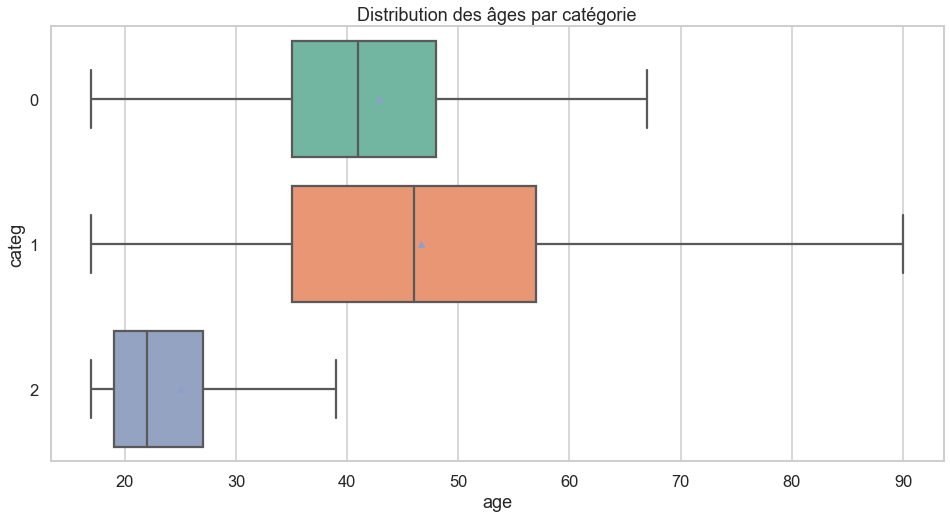

In [121]:
sns.boxplot(data=lp, x='age', y='categ', orient='h',
            showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie')
plt.show()


- Les individus qui achetent les produits de la catégorie 0 ont une age médian de 41 ans
- Les individus qui achetent les produits de la catégorie 1 ont une age médian de 48 ans
- Les individus qui achetent les produits de la catégorie 2 ont une age médian de 23 ans


## Conclusion de l'analyse de corrélation

- Les 30-50 ans dépensent relativement plus, plus fréquemment et le panier moyen contient plus d'articles que pour les autres tranches d'âge. Mais ils sont davantage interessés par les catégories 1 et 0, qui ont des prix moins élevés que la catégorie 2.
- Ce sont les 15-30 ans qui achètent davantage des produits de la catégorie 2, qui sont les produits les plus chers.
- Ce sont les produits de la catégorie 1 qui intéressent le plus de clients différents, il s'agit d'une "catégorie tout public".
- Nous ne pouvons pas déterminer de différence majeur entre chacun des sexes.
